In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [84]:
audio_file_path='UrbanSound8K/dog_bark.wav'

In [85]:
librosa_audio_path,librosa_sample_rate=librosa.load(audio_file_path)

In [86]:
print(librosa_audio_path)

[0.00487425 0.00819208 0.00703696 ... 0.02824901 0.03107748 0.02227508]


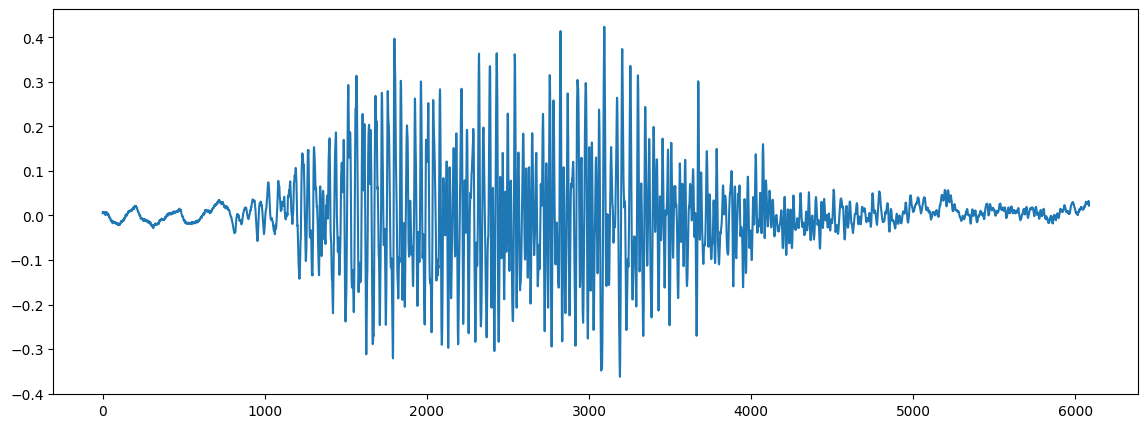

In [87]:
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_path)

In [88]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [89]:
wave_audio

array([[196, 170],
       [262, 262],
       [260, 249],
       ...,
       [948, 948],
       [983, 999],
       [968, 974]], dtype=int16)

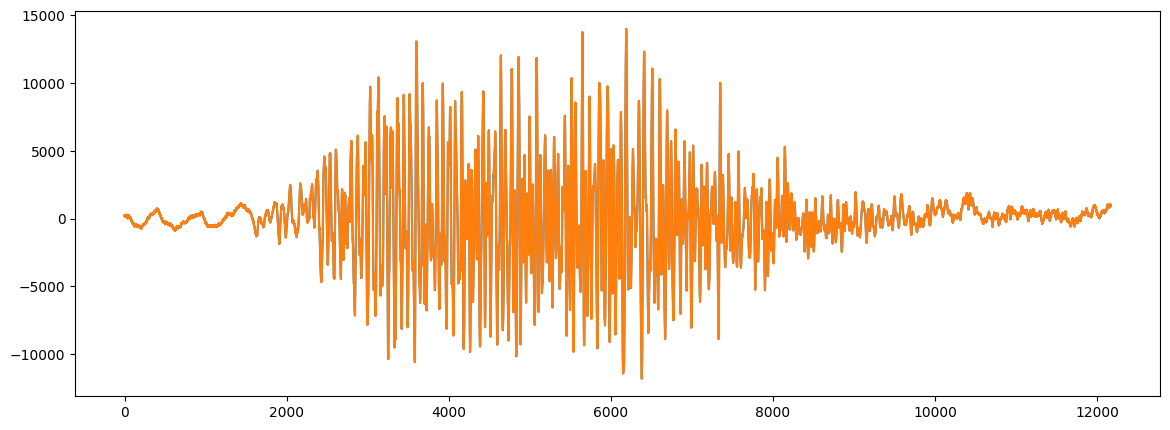

In [90]:
#original audio file with 2 channels
plt.figure(figsize=(14,5))
plt.plot(wave_audio)

In [91]:
#Extract Features
mfccs = librosa.feature.mfcc(y=librosa_audio_path, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

(40, 12)


array([[-4.19402344e+02, -3.20403778e+02, -1.94957336e+02,
        -1.30369598e+02, -1.18200096e+02, -1.31210205e+02,
        -1.40890594e+02, -1.68459625e+02, -2.17789490e+02,
        -2.69989380e+02, -3.04758759e+02, -3.24505981e+02],
       [ 9.89728394e+01,  1.44067749e+02,  1.70171417e+02,
         1.73616730e+02,  1.75195709e+02,  1.72170670e+02,
         1.80429504e+02,  1.82160370e+02,  1.76632263e+02,
         1.70379608e+02,  1.58335876e+02,  1.37084320e+02],
       [ 3.47493935e+01,  2.98697853e+01, -1.12461567e+01,
        -3.70590897e+01, -4.90301476e+01, -4.75278206e+01,
        -3.95600510e+01, -3.71595688e+01, -3.03312073e+01,
        -8.57555771e+00,  9.52523613e+00,  1.22645912e+01],
       [ 3.42337494e+01,  1.67860909e+01, -7.07802343e+00,
        -2.19214363e+01, -3.31980591e+01, -4.44558182e+01,
        -5.37171478e+01, -5.55837326e+01, -4.37967377e+01,
        -3.14555416e+01, -1.62919922e+01, -2.09491563e+00],
       [ 2.30200768e+01,  1.28846538e+00, -1.0817657

In [92]:
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [93]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [94]:
import numpy as np
from tqdm import tqdm

# Assuming you have defined the 'metadata' DataFrame and the 'features_extractor' function

extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    if final_class_labels in ['car_horn', 'siren']:  # Check if the class is either 'car_horn' or 'siren'
        data = features_extractor(file_name)
        extracted_features.append([data, final_class_labels])


3463it [01:01, 245.77it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8268it [02:01, 268.22it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:09, 67.29it/s] 


In [98]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(20)


,feature,class
0,"[-196.822, 113.993126, -13.813408, 0.40220985,...",car_horn
1,"[-203.38026, 110.47649, -27.654587, 13.878089,...",car_horn
2,"[-207.671, 90.18287, -24.141148, 28.216301, -2...",car_horn
3,"[-204.53479, 102.78963, -29.137644, 26.669737,...",car_horn
4,"[-120.24412, 62.12232, -18.887354, 18.433933, ...",car_horn
5,"[-215.86981, 140.63843, -49.507374, -2.0932896...",siren
6,"[-211.69771, 136.81721, -51.624107, -5.3300605...",siren
7,"[-216.69238, 136.44629, -44.326427, -7.3999777...",siren
8,"[-225.21686, 129.49518, -40.13869, -4.6706123,...",siren
9,"[-213.51173, 115.78972, -29.982782, -6.4409947...",siren


In [99]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [100]:
X.shape

(1358, 40)

In [143]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [141]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

ValueError: y should be a 1d array, got an array of shape (1358, 2) instead.

In [142]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [104]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
X_train

array([[-2.8627866e+02,  1.4954665e+02, -8.0698174e+01, ...,
        -3.3783545e+00, -2.0619943e+00,  1.1785549e+00],
       [-3.2141785e+02,  4.7196575e+01, -5.2577290e+01, ...,
        -2.5877300e-01, -6.8259978e-01,  1.0931168e+00],
       [-2.0246509e+02,  1.4107753e+02, -4.8889660e+01, ...,
        -1.5744879e+01, -1.6921667e+01,  4.6302266e+00],
       ...,
       [-3.2663199e+02,  9.2898819e+01, -1.1540613e+01, ...,
         1.9340361e+00, -3.5663709e-01, -1.3500443e+00],
       [-5.2059369e+02,  1.2021809e+02,  2.6846674e+01, ...,
        -1.9924458e+00, -1.0795035e+00,  4.6587353e+00],
       [-3.5774591e+02,  2.3725948e+02, -4.5431774e+01, ...,
        -1.0354395e+00,  4.2720261e+00, -3.9390266e+00]], dtype=float32)

In [106]:
X_train.shape

(1086, 40)

In [107]:
X_test.shape

(272, 40)

In [108]:
y_train.shape

(1086, 2)

In [109]:
y_test.shape

(272, 2)

In [110]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [112]:
### No of classes
num_labels=y.shape[1]

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

### No of classes
num_labels=y.shape[1]

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [116]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(
    filepath='/Users/lachitha/Desktop/UrbanSound8K/saved_models/audio_classification.keras',  # Modified filepath
    verbose=1,
    save_best_only=True
)

start = datetime.now()

model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/100
30/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5538 - loss: 18.4036
Epoch 1: val_loss improved from inf to 3.64573, saving model to /Users/lachitha/Desktop/UrbanSound8K/saved_models/audio_classification.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5591 - loss: 17.6931 - val_accuracy: 0.6912 - val_loss: 3.6457
Epoch 2/100
27/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 7.0080 
Epoch 2: val_loss improved from 3.64573 to 0.93992, saving model to /Users/lachitha/Desktop/UrbanSound8K/saved_models/audio_classification.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6472 - loss: 6.8221 - val_accuracy: 0.7794 - val_loss: 0.9399
Epoch 3/100
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 3.6792
Epoch 3: val_loss improved from 0.93992 to 0.46267, saving model to /Users/lachitha/Desktop/UrbanSound8K/saved_models/audio_classification.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6718 - loss: 3.6816 - val_a

In [118]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9889705777168274


In [119]:

mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)



# Get the shape of the feature array
print(mfccs_scaled_features.shape)


(40,)


In [125]:
y_test[1]


array([1., 0.])

In [121]:
model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[7.04044305e-06, 9.99992967e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99976933e-01, 2.31087815e-05],
       [8.75521917e-03, 9.91244733e-01],
       [1.00000000e+00, 2.77426888e-12],
       [7.84460197e-23, 1.00000000e+00],
       [7.05184988e-13, 1.00000000e+00],
       [7.10535675e-09, 1.00000000e+00],
       [3.82380932e-12, 1.00000000e+00],
       [9.67562551e-14, 1.00000000e+00],
       [9.99999881e-01, 6.17870981e-08],
       [2.75966655e-02, 9.72403407e-01],
       [1.00000000e+00, 7.45221319e-29],
       [1.00000000e+00, 2.25209043e-08],
       [4.62061143e-05, 9.99953747e-01],
       [1.00000000e+00, 0.00000000e+00],
       [7.99304313e-22, 1.00000000e+00],
       [2.84973765e-04, 9.99715030e-01],
       [6.08107897e-10, 1.00000000e+00],
       [1.10301254e-02, 9.88969922e-01],
       [8.74556070e-12, 1.00000000e+00],
       [1.00000000e+00, 1.44201154e-23],
       [4.44618673e-14, 1.00000000e+00],
       [1.000000

In [139]:
filename = "UrbanSound8K/100648-1-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#print(mfccs_scaled_features)
# Reshape the features for prediction
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.94917786 0.05082217]]


In [128]:
pip install LabelEncoder

ERROR: Could not find a version that satisfies the requirement LabelEncoder (from versions: none)
ERROR: No matching distribution found for LabelEncoder
Note: you may need to restart the kernel to use updated packages.
